In [19]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import numpy as np

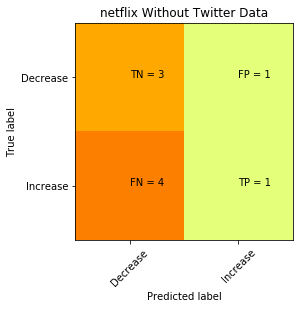

In [49]:
stocks = ["amazon","apple","facebook","google","netflix"]

withTwitter = []
withoutTwitter = []

state = 0
while state < 100:
    for stock in stocks:
        Stock_Prediction = pd.read_csv('..\\faangStockTweets\\' + stock + '.csv')
        Stock_Prediction = pd.DataFrame(Stock_Prediction).head(29)

        ##############################WITH TWITTER DATA##############################################

        X = Stock_Prediction.drop(['Stock_Date','Tweet_Date','change'],axis=1)
        y = Stock_Prediction['change']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=(state+10))



        model = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = state)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        plt.clf()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = ['Decrease','Increase']
        plt.title(stock + ' With Twitter Data')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        s = [['TN','FP'], ['FN', 'TP']]
        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
        #plt.show()

        #print("Model Score: ", model.score(X_train,y_train))
        #print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
        acc = float(metrics.accuracy_score(y_test,y_pred))
        withTwitter.append(acc)
        #print(y_test)
        #print(y_pred)

        feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X_train.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
        #print(feature_importances)

        #############################WITHOUT TWITTER DATA########################################

        X = Stock_Prediction.drop(['Stock_Date','Tweet_Date','change','Positive',
                                  'Negative','Total'],axis=1)
        y = Stock_Prediction['change']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=(state+10))

        model = RandomForestClassifier(n_estimators = 4, criterion = 'entropy', random_state = state)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        plt.clf()
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
        classNames = ['Decrease','Increase']
        plt.title(stock + ' Without Twitter Data')
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        s = [['TN','FP'], ['FN', 'TP']]
        for i in range(2):
            for j in range(2):
                plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
        #plt.show()

        #print("Model Score: ", model.score(X_train,y_train))
        #print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
        acc = float(metrics.accuracy_score(y_test,y_pred))
        withoutTwitter.append(acc)
        #print(y_test)
        #print(y_pred)

        feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X_train.columns,
                                        columns=['importance']).sort_values('importance', ascending=False)
        #print(feature_importances)
    state += 1

In [50]:
amazonWithTwitter = []
appleWithTwitter = []
facebookWithTwitter = []
googleWithTwitter = []
netflixWithTwitter = []

amazonWithoutTwitter = []
appleWithoutTwitter = []
facebookWithoutTwitter = []
googleWithoutTwitter = []
netflixWithoutTwitter = []

x = 0
while x < len(withTwitter):
    if x%5 == 0:
        amazonWithTwitter.append(withTwitter[x])
        amazonWithoutTwitter.append(withoutTwitter[x])
    elif x%5 == 1:
        appleWithTwitter.append(withTwitter[x])
        appleWithoutTwitter.append(withoutTwitter[x])
    elif x%5 == 2:
        facebookWithTwitter.append(withTwitter[x])
        facebookWithoutTwitter.append(withoutTwitter[x])
    elif x%5 == 3:
        googleWithTwitter.append(withTwitter[x])
        googleWithoutTwitter.append(withoutTwitter[x])
    elif x%5 == 4:
        netflixWithTwitter.append(withTwitter[x])
        netflixWithoutTwitter.append(withoutTwitter[x])
    x += 1


In [51]:
print("Amazon With Twitter: ", Average(amazonWithTwitter))
print("Apple With Twitter: ", Average(appleWithTwitter))
print("Facebook With Twitter: ", Average(facebookWithTwitter))
print("Google With Twitter: ", Average(googleWithTwitter))
print("Netflix With Twitter: ", Average(netflixWithTwitter))
print('--------------------------')
print("Amazon Without Twitter: ", Average(amazonWithoutTwitter))
print("Apple Without Twitter: ", Average(appleWithoutTwitter))
print("Facebook Without Twitter: ", Average(facebookWithoutTwitter))
print("Google Without Twitter: ", Average(googleWithoutTwitter))
print("Netflix Without Twitter: ", Average(netflixWithoutTwitter))

Amazon With Twitter:  0.5022222222222222
Apple With Twitter:  0.47444444444444434
Facebook With Twitter:  0.536666666666667
Google With Twitter:  0.5000000000000001
Netflix With Twitter:  0.5277777777777777
--------------------------
Amazon Without Twitter:  0.5055555555555553
Apple Without Twitter:  0.4433333333333331
Facebook Without Twitter:  0.5366666666666667
Google Without Twitter:  0.43111111111111106
Netflix Without Twitter:  0.5455555555555555


In [15]:
def Average(lst):
    return sum(lst)/len(lst)